# Avacado Project

# Problem Statement:
Avocado is a fruit consumed by people heavily in the United States.

Content -

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

Average Price - The average price of a single avocado

Type - Whether it is conventional or organic

Year - The year information

Region - The city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

# Objective:
    To build a model using the data provided and predict the Average Price.

In [207]:
#Importing the necessary Libraries

# linear algebra
import numpy as np 

import warnings
warnings.simplefilter("ignore")

# data processing
import pandas as pd
from pandas_profiling import ProfileReport

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from scipy.stats import norm

# Algorithms
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import linear_model
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import StratifiedKFold
import scikitplot as skplt
from sklearn import metrics

import pickle
import joblib


# Loading the dataset

In [2]:
df= pd.read_csv('avocado.csv')
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

Remarks: "AveragePrice" is the target column which needs to be predicted and the remaining columns are the feature.

In [3]:
#checking the dimension of the dataset
df.shape

(18249, 14)

# Understanding the Dataset

The dataset consists of 18249 rows and 14 columns as explained below:

1. Date: The date of the observation.
2. AveragePrice: Average price of a single avacado.
3. Total Volume: Total number of avacado sold.
4. 4046: Total number of avocados with PLU (Product Lookup Code) 4046 sold.
5. 4225: Total number of avocados with PLU (Product Lookup Code) 4225 sold.
6. 4770: Total number of avocados with PLU (Product Lookup Code) 4770 sold.
7. Total Bags: Total number of bags of avocados sold.
8. Small Bags: Total number of small bags of avocados sold.
9. Large Bags: Total number of large bags of avocados sold.
10. XLarge Bags: Total number of extra large bags of avocados sold.
11. type: Type of avocados (conventional or organic).
12. year: The year of the observation.
13. region: City or region of the observation.
14. Unamed: 0-It is just an index feature.

# Data Exploration/Analysis

In [4]:
#observing the first 5 rows of the dataset
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [5]:
#observing the last 5 rows of the dataset
df.tail()

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

Remarks: "Unnamed: 0" column is a useless index feature so we will remove it in pre-processing.

In [6]:
#printing the name of all columns.
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
#checking datatype and memory information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Observations:
    
    We see that there is no any missing values (18249 complete data) and 14 columns in our dataset.
    
    There are 9 continuous features and 3 discrete(categorical) features.    

    The feature 'Date' is of object type so we have to change its type to datetime.

In [8]:
#checking null count for each column
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Remarks: We can see that no missing values exist in the dataset.

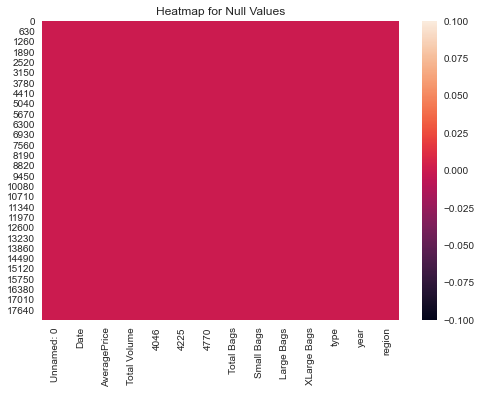

In [9]:
#visualizing the null count with heatmap
sns.heatmap(df.isnull())
plt.title("Heatmap for Null Values")
plt.show()

Observation: No null values are present.

# Profiling:

We are checking Profiling before pre-processing dataset to get initial observations from the dataset in better visual aspects, to find correlation matrix and sample data.

In [10]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_widgets()

# Data pre-processing:

In [11]:
#dropping the "Unnamed: 0" column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
df.shape

(18249, 13)

Remarks: The shape of our dataset has changed to 18249 rows and 13 columns.

In [13]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

Remarks: We don't see the "Unnamed: 0" column in the column names.

In [14]:
#Converting 'Date' to datetime datatype
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [15]:
#checking the head of the dataset to see how our data looks like now.
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region  Month  Day  
0  Albany     12   27  
1  Albany     12   20  
2  Albany     12   13  
3  Albany     12    6  
4  Albany     11   29

Remarks: We have separated the Date column into 2 columns namely Month and Day. 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Month         18249 non-null  int64         
 14  Day           18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

Remarks: There are 2 categorical (object type) namely 'type' and 'region' features present which needs to be encoded.

In [17]:
#checking unique values
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

Remarks: This gives us an insight about all the unique values present in each column of the dataset.

# Statistical Analysis

In [193]:
df.describe().T.style.background_gradient(cmap='flag')

Observations:

   We can see all the columns are having count 18249 which indicates it doesn't contain any missing values.
    
   Mean is greater than median in Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags and 
 XLarge Bags which indicates that data is right skewed.

   Standard Deviation is higher in all features except AveragePrice,year ,Month and Day which indicates data is heavily spreaded.

   Large difference between 75th percentile and max is present in all features except AveragePrice, year,Month and Day which 
 indicates outliers may be there.

# Exploratory Data Analysis (EDA)

# Univariate Analysis:

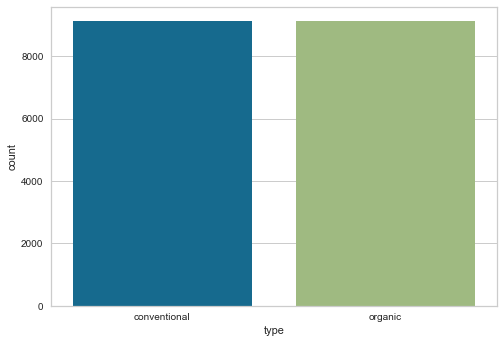

conventional    9126
organic         9123
Name: type, dtype: int64


In [19]:
#checking 'type' of avocado with countplot
sns.countplot(x='type', data=df)
plt.show()
print(df['type'].value_counts())

Remarks: It shows that we have data points for conventional and organic avocados.

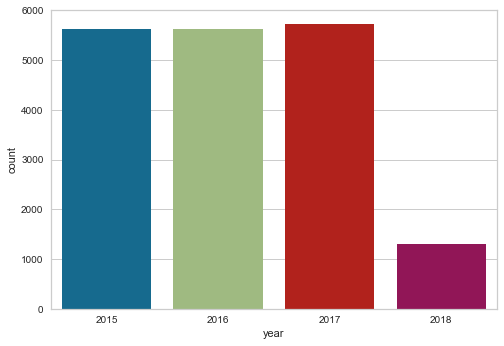

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


In [23]:
#Checking feature 'Year' with countplot
sns.countplot(x='year',data=df)
plt.show()
print(df['year'].value_counts())

Remarks: Its shows that the obseravtions from 2018 is very less compared to  2015, 2016 and 2017.

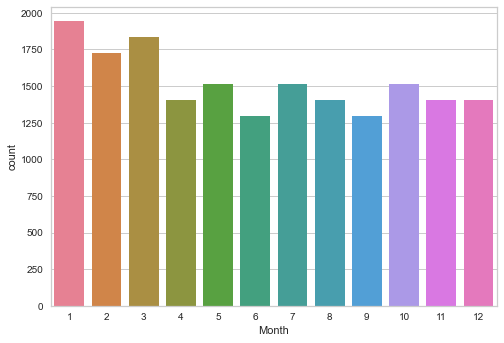

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64


In [35]:
#checking feature month and day with countplot
sns.countplot(x='Month', data=df, palette="husl")
plt.show()
print(df['Month'].value_counts())

Remarks: It shows that in the month of January, February and March, the highest no. of avocados are being sold and least no. of avocados are being sold in June and september.

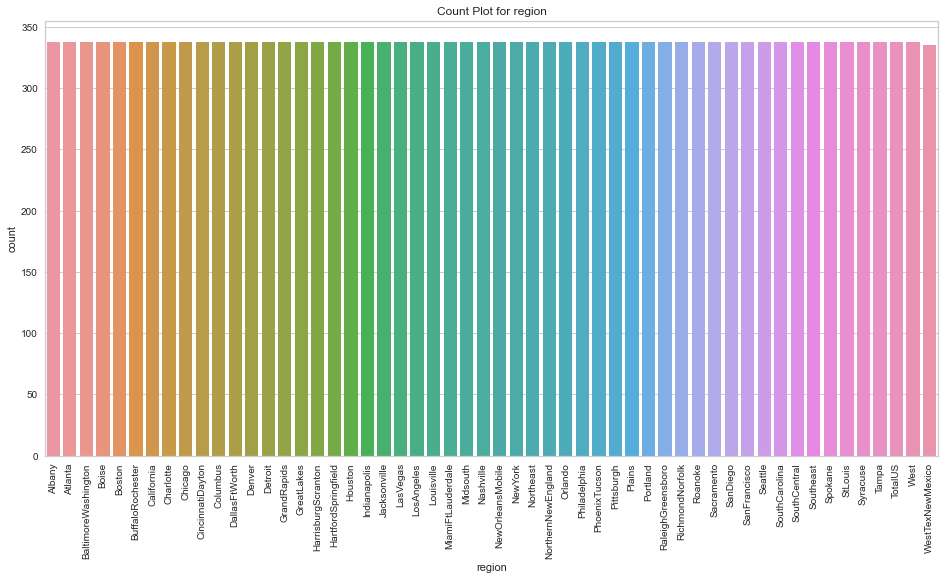

Average: 337.94444444444446	 Minimum: 335	 Maximum: 338


In [42]:
#Checking feature 'Region' using countplot
X='region'
plt.figure(figsize=(16,8))
sns.countplot(df[X])
plt.title(f'Count Plot for {X}')
plt.xticks(rotation=90)
plt.show()

print(f'Average: {df[X].value_counts().mean()}\t Minimum: {df[X].value_counts().min()}\t Maximum: {df[X].value_counts().max()}')

Remarks: It shows that the number of observation is same for all the region except for WestTexNewMexico which is slighltly less compared to the other regions.

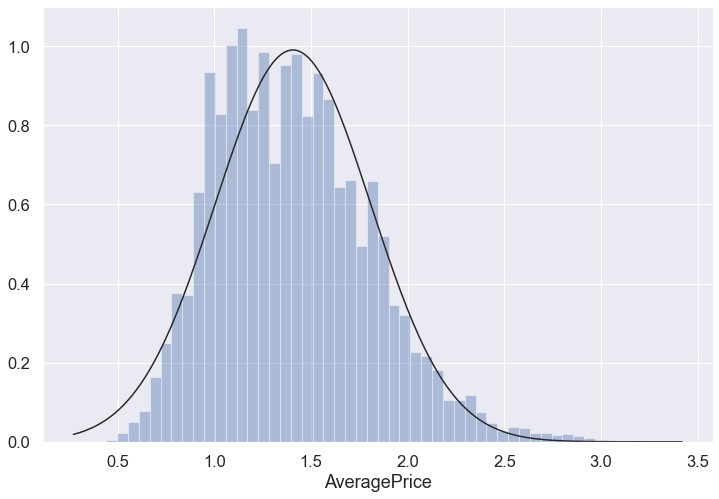

In [50]:
#checking distribution plot for AveragePrice
sns.set(font_scale=1.5) 
fig, ax = plt.subplots(figsize=(12, 8))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)
plt.show()

Remarks: It shows that the Average price distribution of avocado in most cases is between 1.1 to 1.5.

<AxesSubplot:xlabel='AveragePrice'>

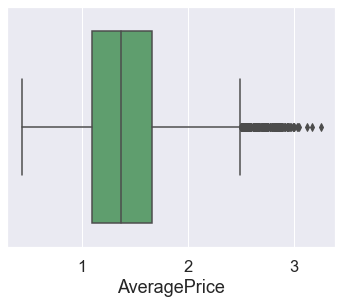

In [59]:
#Checking feature Average Price using boxplot
plt.figure(figsize=(20,15))
plt.subplot(3,3,6)
sns.boxplot(df.AveragePrice,color='g')

In [60]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month', 'Day'],
      dtype='object')

Remarks: It shows that there are some outliers present in this column which we will be removing later.

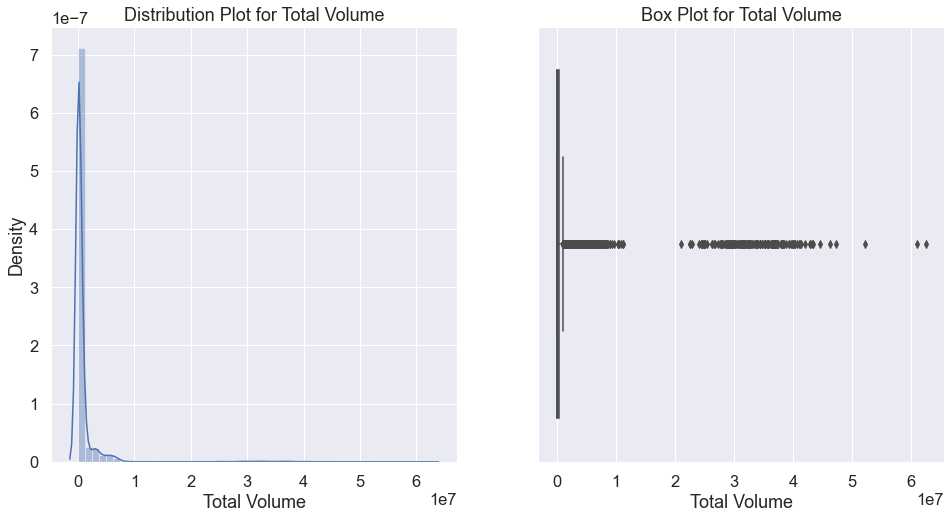

In [75]:
#Checking feature Total Volume using distplot and boxplot
x='Total Volume'
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))

#Distribution Plot
sns.distplot(df[x],ax=ax1)
ax1.set_title(f'Distribution Plot for {x}')

#Box Plot
sns.boxplot(df[x],ax=ax2)
ax2.set_title(f'Box Plot for {x}')

plt.show()

Remarks: 
    
    The distribution plot shows that Data is not distributed normally.
    
    Box plot shows the presence of outliers.

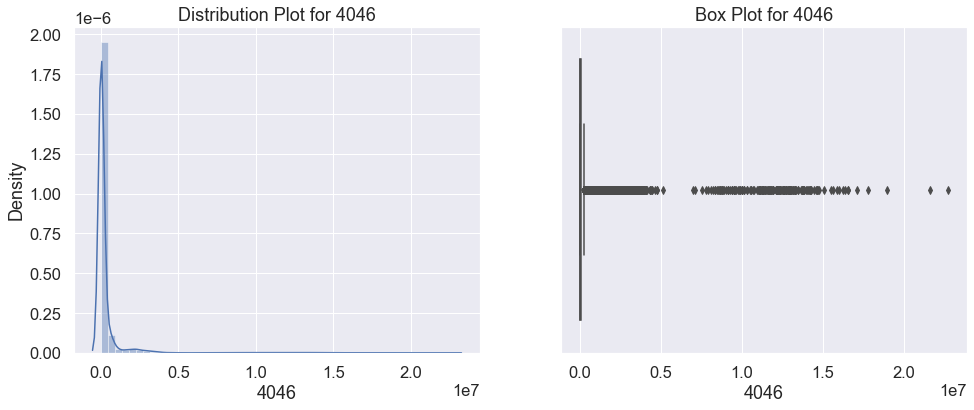

In [76]:
#Checking feature 4046 using distplot and boxplot
x='4046'
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

#Distribution Plot
sns.distplot(df[x],ax=ax1)
ax1.set_title(f'Distribution Plot for {x}')

#Box Plot
sns.boxplot(df[x],ax=ax2)
ax2.set_title(f'Box Plot for {x}')

plt.show()

Remarks:

    Distribution plot shows that Data is not distributed normally.        
    
    Box plot shows the presence of outliers.

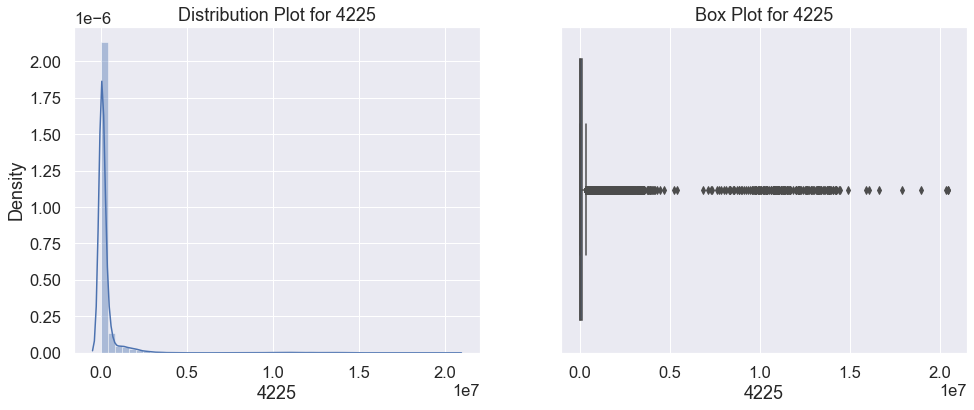

In [78]:
#Checking feature 4225 using distplot and boxplot
x='4225'
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

#Distribution Plot
sns.distplot(df[x],ax=ax1)
ax1.set_title(f'Distribution Plot for {x}')

#Box Plot
sns.boxplot(df[x],ax=ax2)
ax2.set_title(f'Box Plot for {x}')

plt.show()

Remarks:

    Distribution plot shows that data is not distributed normally.        
    
    Box plot shows the presence of outliers.

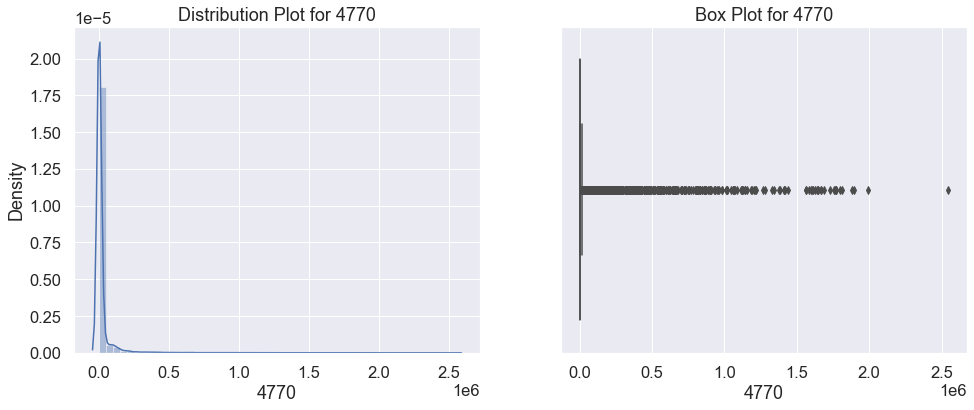

In [79]:
#Checking feature 4770 using distplot and boxplot
x='4770'
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

#Distribution Plot
sns.distplot(df[x],ax=ax1)
ax1.set_title(f'Distribution Plot for {x}')

#Box Plot
sns.boxplot(df[x],ax=ax2)
ax2.set_title(f'Box Plot for {x}')

plt.show()

Remarks:

    The distribution plot shows that the data is not distributed normally.        
    
    Box plot shows the presence of outliers.

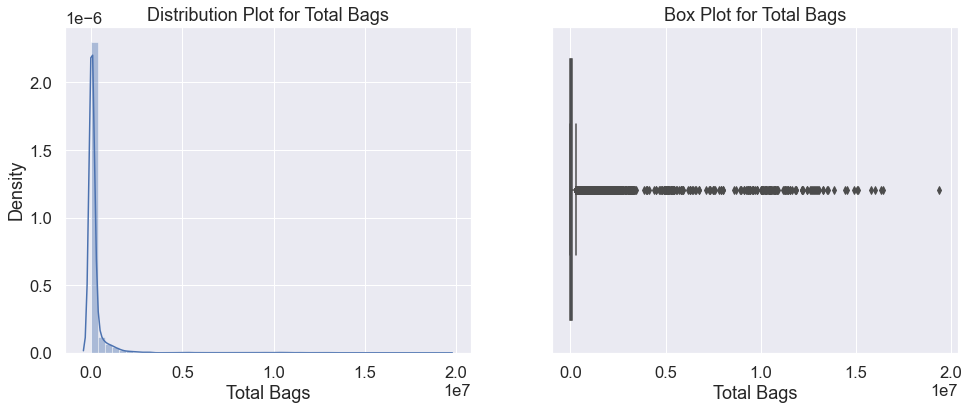

In [81]:
#Checking feature Total Bags using distplot and boxplot
x='Total Bags'
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

#Distribution Plot
sns.distplot(df[x],ax=ax1)
ax1.set_title(f'Distribution Plot for {x}')

#Box Plot
sns.boxplot(df[x],ax=ax2)
ax2.set_title(f'Box Plot for {x}')

plt.show()

Remarks:

    The distribution plot shows that the data is not distributed normally.        
    
    Box plot shows the presence of outliers.


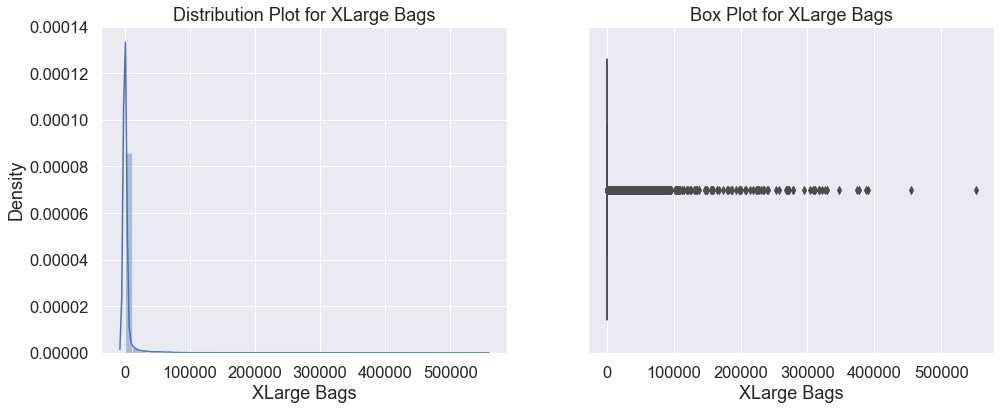

In [82]:
#Checking feature XLarge Bags using distplot and boxplot
x='XLarge Bags'
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

#Distribution Plot
sns.distplot(df[x],ax=ax1)
ax1.set_title(f'Distribution Plot for {x}')

#Box Plot
sns.boxplot(df[x],ax=ax2)
ax2.set_title(f'Box Plot for {x}')

plt.show()

Remarks:

The distribution plot shows that the data is not distributed normally.        

Box plot shows the presence of outliers.

# Bi-Variate Analysis:

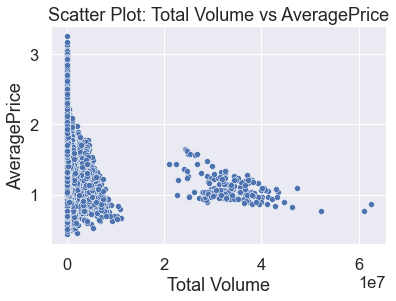

In [85]:
#Checking relationship between Total Volume and Average Price using scatterplot
x='Total Volume'
y='AveragePrice'
sns.scatterplot(x,y,data=df)
plt.title(f'Scatter Plot: {x} vs {y}')
plt.show()

Remarks: It shows that most of the Average Price lies between (0 to 0.7)x1e7 of Total Volume.

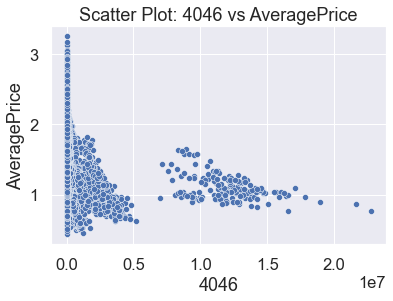

In [86]:
#Checking relationship between 4046 and Average Price using scatter plot
x='4046'
y='AveragePrice'
sns.scatterplot(x,y,data=df)
plt.title(f'Scatter Plot: {x} vs {y}')
plt.show()

Remarks: The plot shows that most of the average price (from 0.2 to 1.9) lies between (0 to 0.6)x1e7 of 4046.

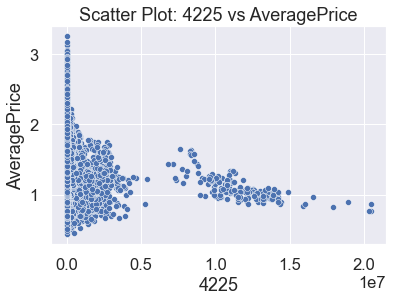

In [89]:
#Checking relationship between 4225 and Average Price using scatter plot
x='4225'
y='AveragePrice'
sns.scatterplot(x,y,data=df)
plt.title(f'Scatter Plot: {x} vs {y}')
plt.show()

Remarks: It shows that most of the Average Price (from 0.1 to 1.9) lies between (0 to 0.4)x1e7 of 4225.

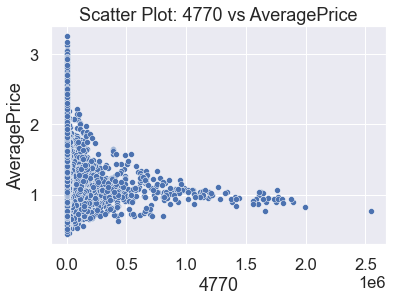

In [90]:
#Checking relationship between 4770 and Average Price using scatter plot
x='4770'
y='AveragePrice'
sns.scatterplot(x,y,data=df)
plt.title(f'Scatter Plot: {x} vs {y}')
plt.show()

Remarks: It shows that most of the Average Price (from 0.2 to 1.7) lies between (0 to 0.6)x1e7 of 4770.

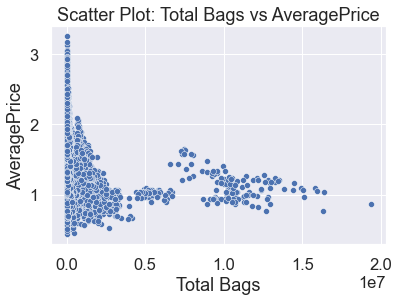

In [91]:
#Checking relationship between Total Bags and Average Price using scatter plot
x='Total Bags'
y='AveragePrice'
sns.scatterplot(x,y,data=df)
plt.title(f'Scatter Plot: {x} vs {y}')
plt.show()

Remarks: It shows that most of the Average Price (from 0.2 to 1.6) lies between (0 to 0.4)x1e7 of Total Bags.

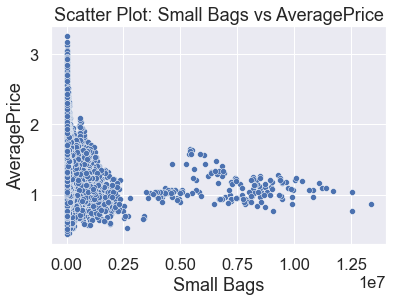

In [92]:
#Checking relationship between Small Bags and Average Price using scatter plot
x='Small Bags'
y='AveragePrice'
sns.scatterplot(x,y,data=df)
plt.title(f'Scatter Plot: {x} vs {y}')
plt.show()

Remarks: It shows that most of the Average Price (from 0.2 to 1.8) lies between (0 to 0.25)x1e7 of Small Bags.

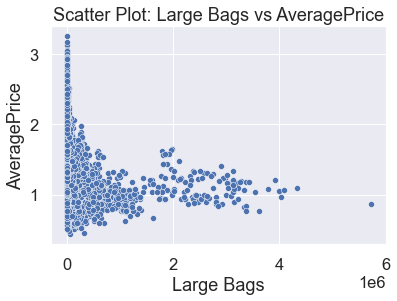

In [93]:
#Checking relationship between Large Bags and Average Price using scatter plot
x='Large Bags'
y='AveragePrice'
sns.scatterplot(x,y,data=df)
plt.title(f'Scatter Plot: {x} vs {y}')
plt.show()

Remarks: It shows that most of the Average Price (from 0.2 to 1.6) lies between (0 to 1.6)x1e7 of Large Bags.

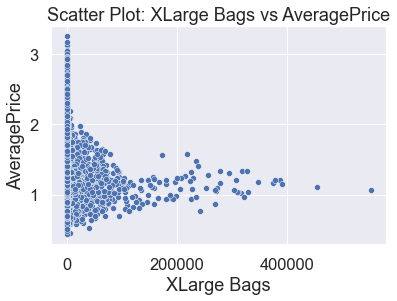

In [94]:
#Checking relationship between XLarge Bags and Average Price using scatter plot
x='XLarge Bags'
y='AveragePrice'
sns.scatterplot(x,y,data=df)
plt.title(f'Scatter Plot: {x} vs {y}')
plt.show()

Remarks: It shows that most of the Average Price (from 0.2 to 2.0) lies between (0 to 200000) of XLarge Bags.

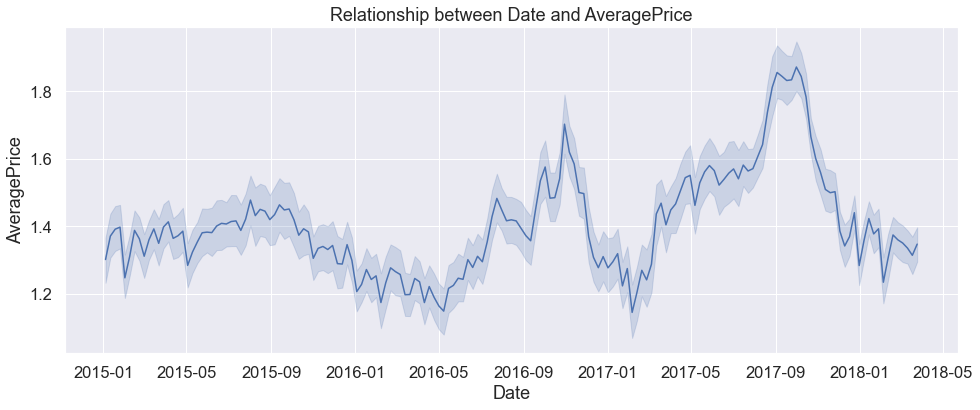

In [96]:
#Checking relationship between Date & Average Price using lineplot
x='Date'
y='AveragePrice'
plt.figure(figsize=(16,6))
sns.lineplot(df[x],y,data=df)
plt.title(f"Relationship between {x} and {y}")
plt.show()

Remarks: 

The plot shows the average price of avocado at various points of time. 

This also shows there was a huge rise in prices after July 2017 and before Jan 2018.

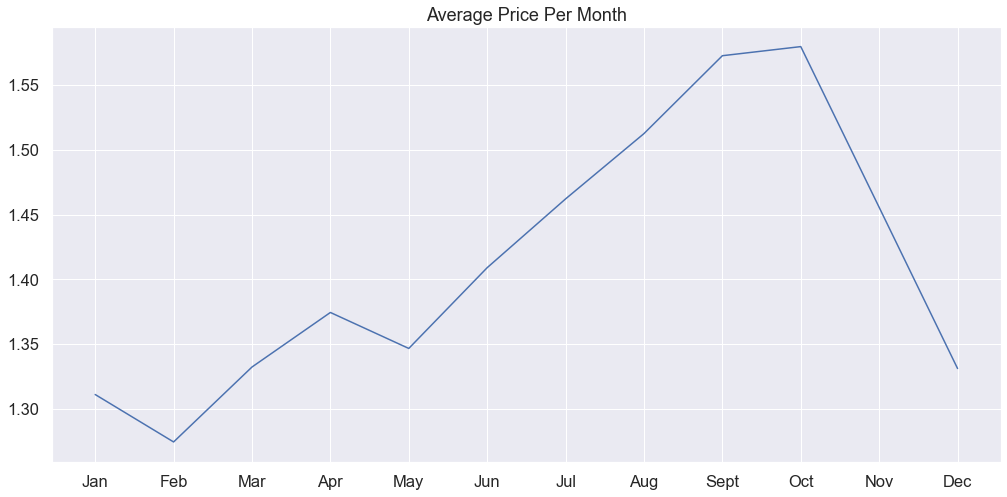

In [103]:
#Checking relationship between Month & Average Price using lineplot
Month = df.groupby("Month").mean()
plt.figure(figsize=(17,8))
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"],Month['AveragePrice'])
plt.title('Average Price Per Month')
plt.show()

Remarks: This plot shows that the Average price rises for a while in February to March, then it falls a bit in April, and then it gradually rises from the month of May and reaches its peak in the month of October and then it drastically starts to fall.

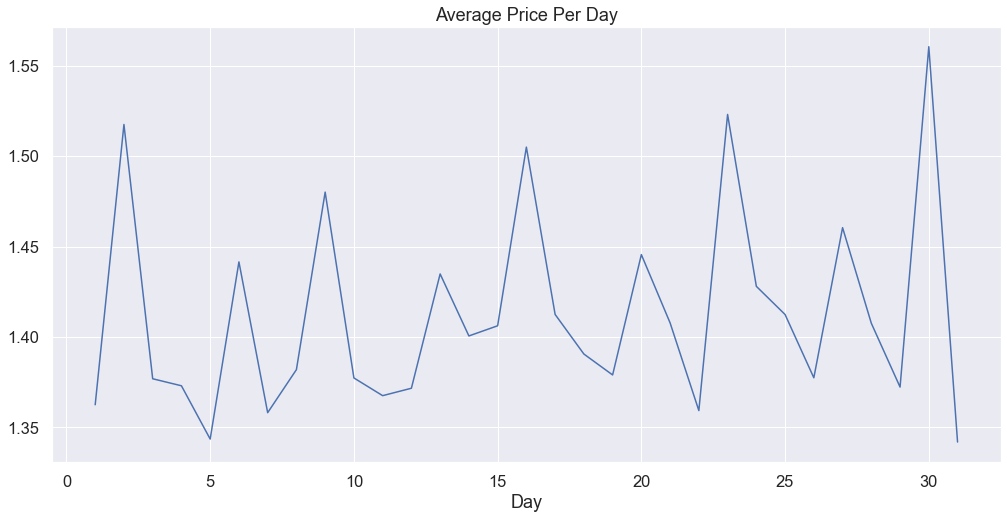

In [104]:
#Checking relationship between Day & Average Price using lineplot
Day = df.groupby("Day").mean()
plt.figure(figsize=(17,8))
Day['AveragePrice'].plot()
plt.title('Average Price Per Day')
plt.show()

Remarks: The above plot shows that the price fluctuates in a similar manner at a regular interval.

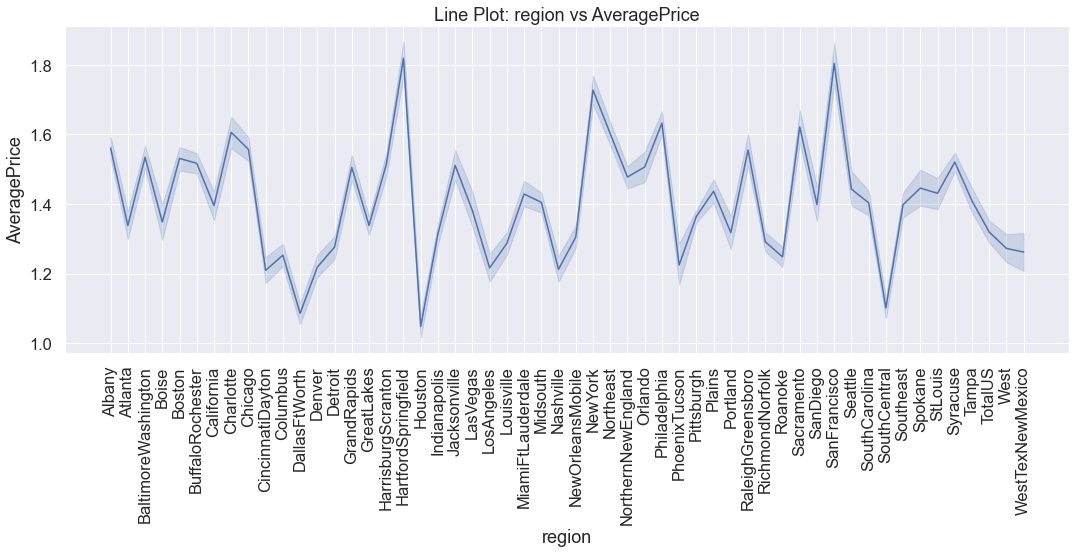

In [108]:
#Checking relationship between Region and Average Price using lineplot
x='region'
y='AveragePrice'
plt.figure(figsize=(18,6))
sns.lineplot(x,y,data=df)
plt.title(f'Line Plot: {x} vs {y}')
plt.xticks(rotation=90)
plt.show()

Remarks:The plot shows that-
    
    Average Price is maximum in HartfordSpringfield.
    
    Average Price is lowest in Houston.

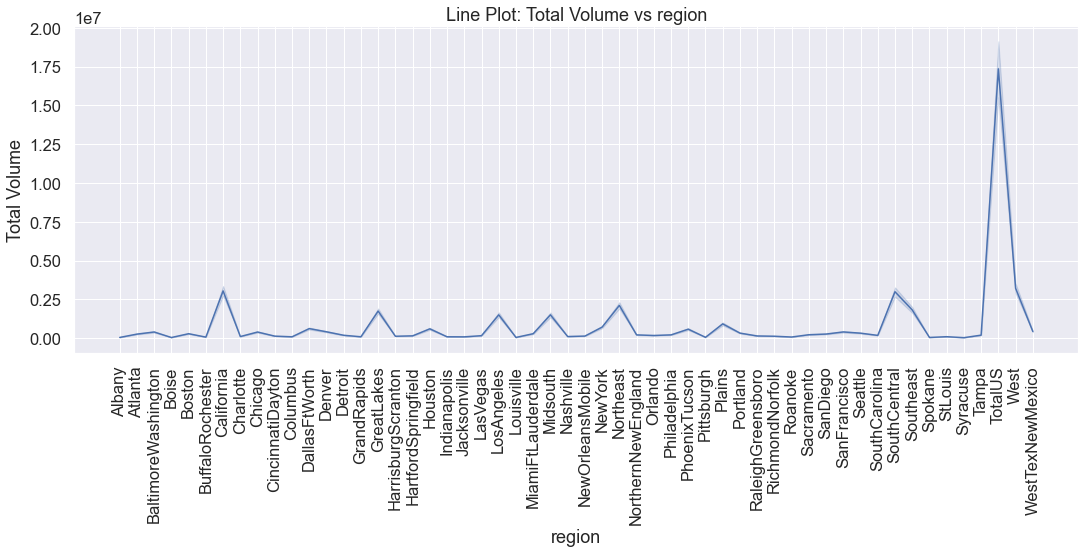

In [109]:
#Checking relationship between Total Volume and Region using lineplot
x='Total Volume'
y='region'
plt.figure(figsize=(18,6))
sns.lineplot(y,x,data=df)
plt.title(f"Line Plot: {x} vs {y}")
plt.xticks(rotation=90)
plt.show()

Remarks: It shows that-
    
    Total Volume is highest in the region TotalUS.
    
    Most of the Region have a similar Total Volume.

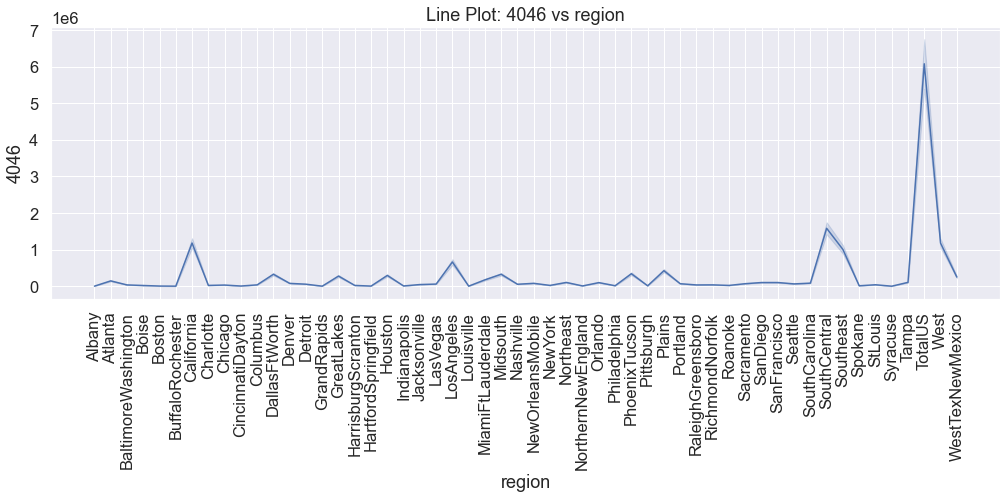

In [111]:
#Checking relationship between 4046 and Region using lineplot
x='4046'
y='region'
plt.figure(figsize=(17,5))
sns.lineplot(y,x,data=df)
plt.title(f"Line Plot: {x} vs {y}")
plt.xticks(rotation=90)
plt.show()


Remarks:
    
    4046 is maximum in region TotalUS.
    
    4046 is almost equal in most of the region.

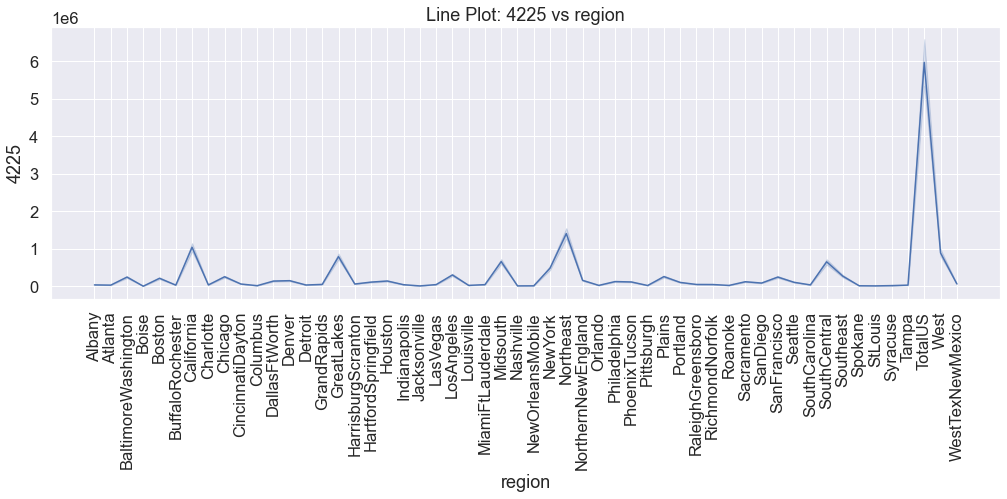

In [112]:
#Checking relationship between 4225 and Region using lineplot
x='4225'
y='region'
plt.figure(figsize=(17,5))
sns.lineplot(y,x,data=df)
plt.title(f"Line Plot: {x} vs {y}")
plt.xticks(rotation=90)
plt.show()

In [ ]:
Remarks:
    
    4225 is maximum in Region TotalUS.
    
    4225 is almost similar in most of the Region.

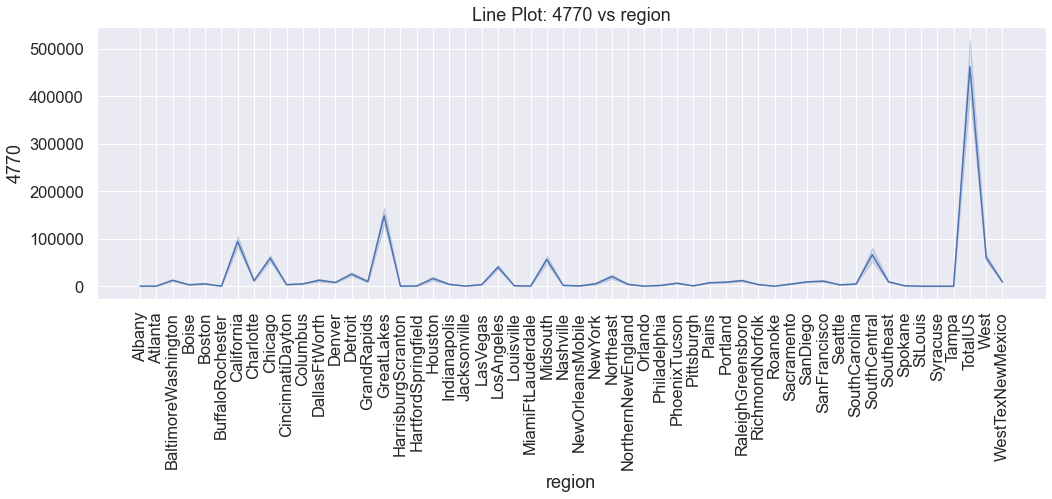

In [113]:
#Checking relationship between 4770 and Region using lineplot
x='4770'
y='region'
plt.figure(figsize=(17,5))
sns.lineplot(y,x,data=df)
plt.title(f"Line Plot: {x} vs {y}")
plt.xticks(rotation=90)
plt.show()

Remarks:
    
    4770 is highest in Region TotalUS.
    
    4770 is almost similar in most of the Region except for California, GreatLakes, Midsouth and SouthCentral.

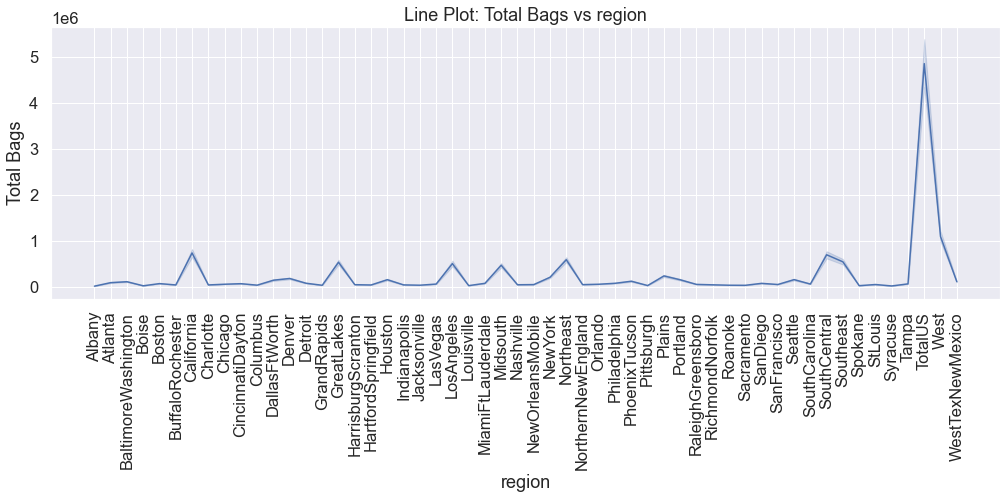

In [114]:
#Checking relationship between Total Bags and Region using lineplot
x='Total Bags'
y='region'
plt.figure(figsize=(17,5))
sns.lineplot(y,x,data=df)
plt.title(f"Line Plot: {x} vs {y}")
plt.xticks(rotation=90)
plt.show()

Remarks:
    
    Total Bags is highest in the region TotalUS.
    
    Total Bags are similar in most of the Region except for California, GreatLakes, Northeast and SouthCentral.

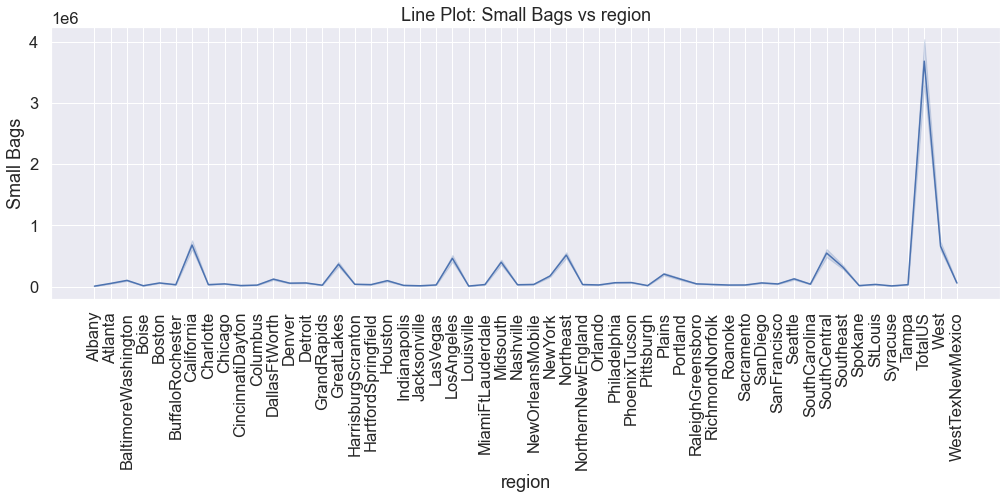

In [115]:
#Checking relationship between Small Bags and Region using lineplot
x='Small Bags'
y='region'
plt.figure(figsize=(17,5))
sns.lineplot(y,x,data=df)
plt.title(f"Line Plot: {x} vs {y}")
plt.xticks(rotation=90)
plt.show()

Remarks:
    
    Small Bags is highest in region TotalUS.
    
    Small Bags are similar in most of the Region except for California, GreatLakes, Midsouth, Northeast and SouthCentral.

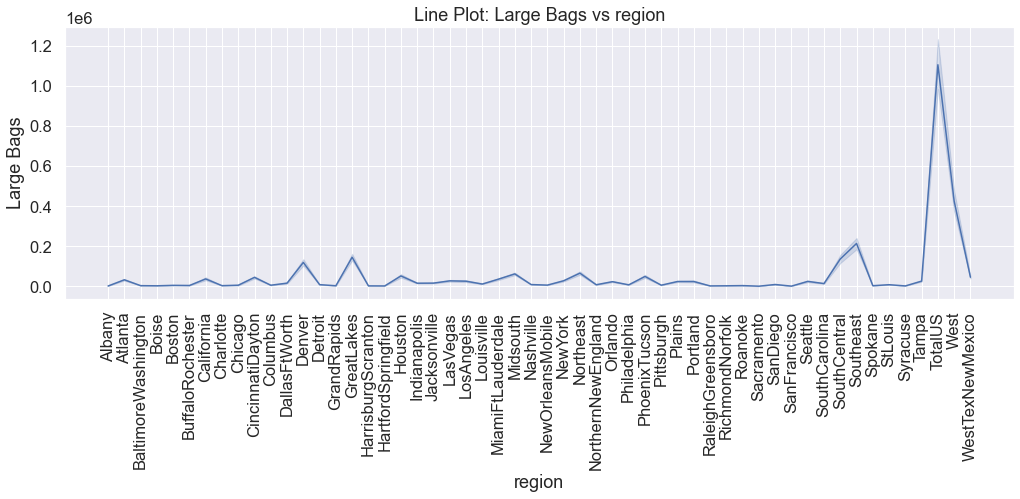

In [116]:
#Checking relationship between Large Bags and Region using lineplot
x='Large Bags'
y='region'
plt.figure(figsize=(17,5))
sns.lineplot(y,x,data=df)
plt.title(f"Line Plot: {x} vs {y}")
plt.xticks(rotation=90)
plt.show()

Remarks:
    
    Large Bags is highest in TotalUS.
    
    Large Bars are almost similar in most of the Region except for Denver, GreatLakes, and Southeast.

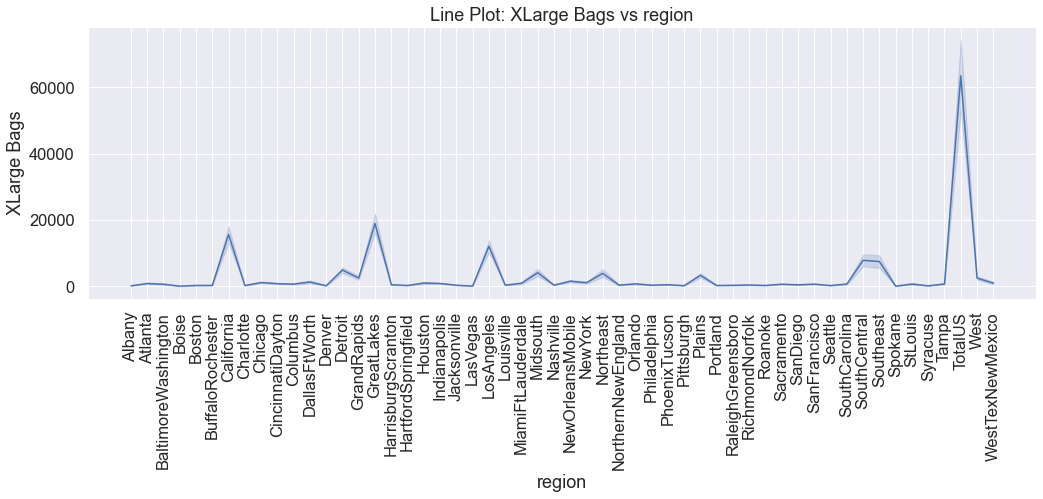

In [117]:
#Checking relationship between Xlarge Bags and Region using lineplot
x='XLarge Bags'
y='region'
plt.figure(figsize=(17,5))
sns.lineplot(y,x,data=df)
plt.title(f"Line Plot: {x} vs {y}")
plt.xticks(rotation=90)
plt.show()

Remarks:
    
    XLarge Bags is highest in TotalUS.
    
    XLarge Bags are almost similar in most of the Region except for California, GreatLakes, LosAngeles and SouthCentral.

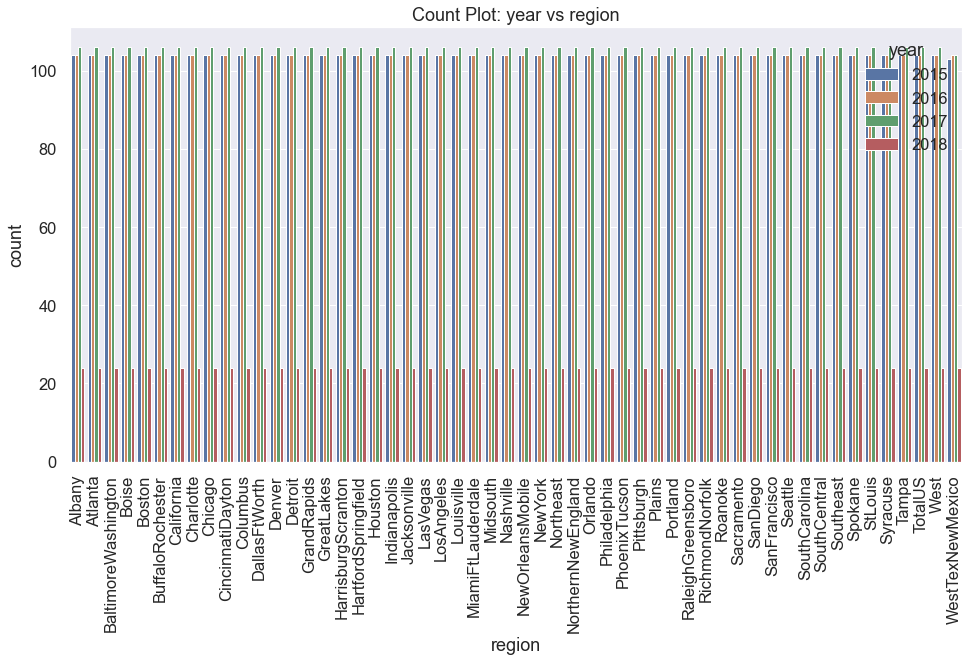

In [124]:
#Checking relationship between Year and Region using countplot
x='year'
y='region'
plt.figure(figsize=(16,8))
sns.countplot(y,hue=x,data=df)
plt.title(f"Count Plot: {x} vs {y}")
plt.xticks(rotation=90)
plt.show()

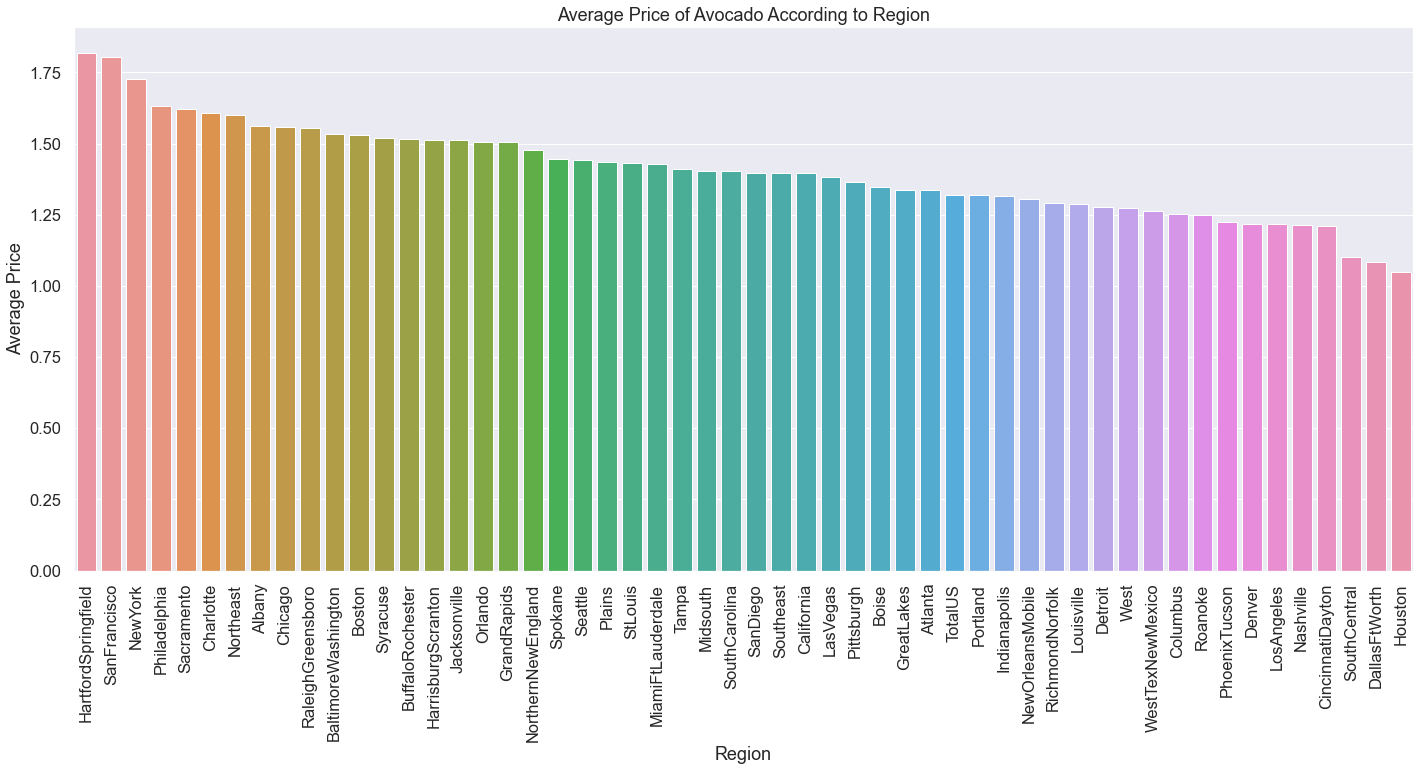

In [129]:
#checking Average price according to the regions with barplot
Region=list(df.region.unique())
avg_price=[]

for i in region_list:
    x=df[df.region==i]
    reg_avg=sum(x.AveragePrice)/len(x)
    avg_price.append(reg_avg)

df1=pd.DataFrame({'Region':Region,'avg_price':avg_price})
new_index=df1.avg_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.Region,y=sorted_data.avg_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')
plt.show()

Remarks: The top 5 regions where price is very high:
        -HartfordSpringfield
        -SanFrancisco
        -NewYork
        -Philadelphia
        -Sacramento
        
        The regions where price is lowest: SouthCentral, DallasFWorth and Houston.

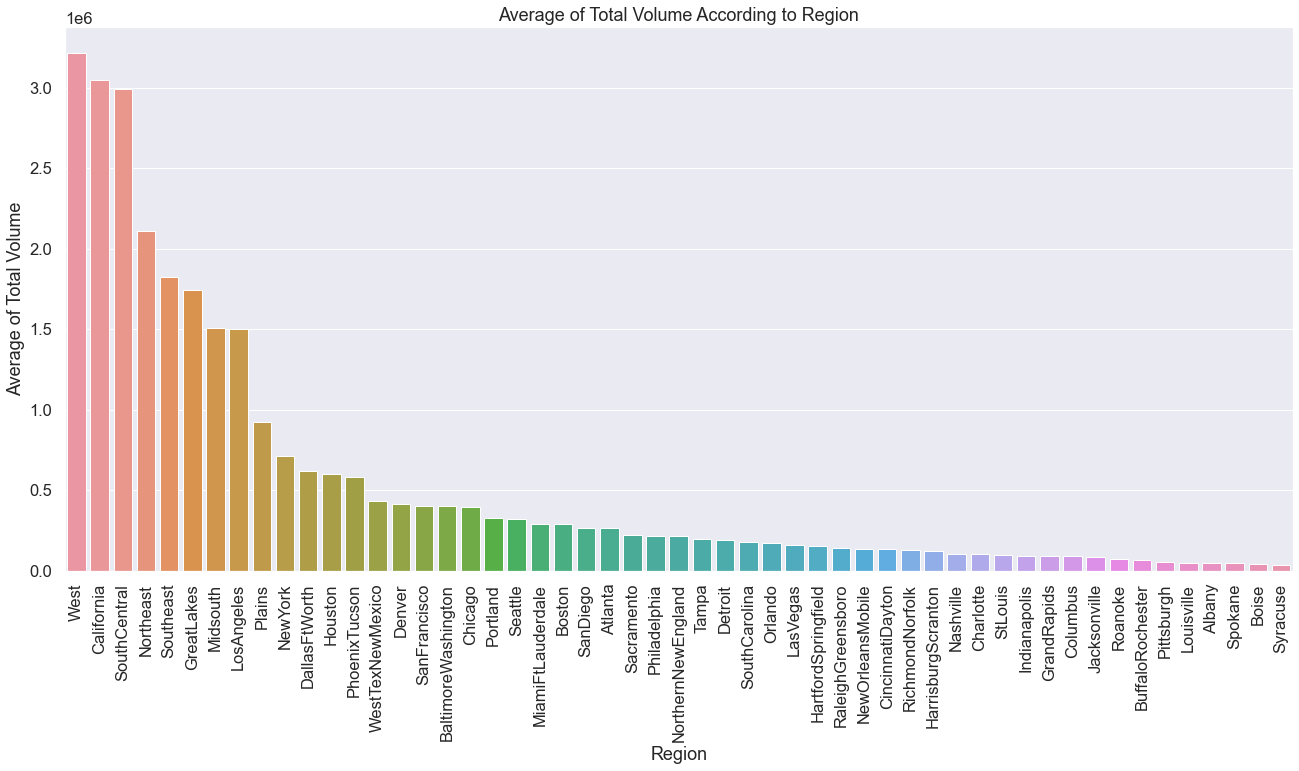

In [131]:
#checking Total Volume with respect to the region using barplot
Fil=df.region!='TotalUS'
df1=df[Fil]

reg_list=list(df1.region.unique())
avg_total_volume=[]

for i in reg_list:
    x=df1[df1.region==i]
    avg_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'reg_list':reg_list,'avg_total_volume':avg_total_volume})

new_index=df3.avg_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.reg_list,y=sorted_data1.avg_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')
plt.show()

Remarks: The top 5 region where Consumption is very high are West, California, SouthCentral, Northeast and Southeast; and is lowest in Syracuse.

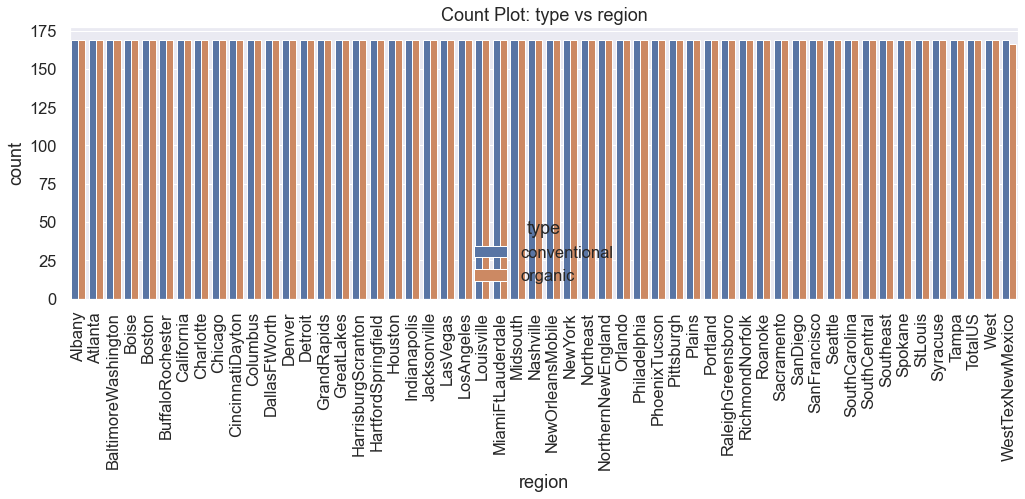

In [134]:
#Checking relationship between type and Region using countplot
x='type'
y='region'
plt.figure(figsize=(17,5))
sns.countplot(y,hue=x,data=df)
plt.title(f"Count Plot: {x} vs {y}")
plt.xticks(rotation=90)
plt.show()

Remarks:This shows that both conventional and organic type of avocados were sold in all region in almost equal amount except for WestTexasNewMexico region.

<Figure size 1080x720 with 0 Axes>

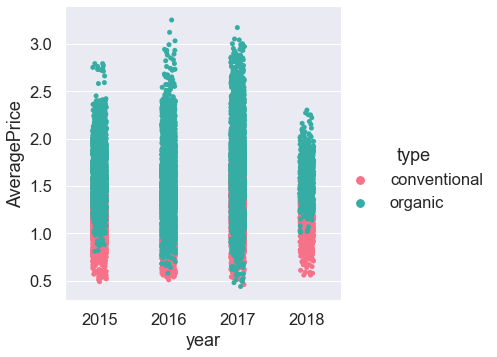

In [135]:
#checking the average price of types of avocados w.r.t year
plt.figure(figsize=(15,10))
sns.catplot(x="year", y="AveragePrice", hue="type", data=df, palette="husl")
plt.show()

Remarks: We can from the plot above that organic types are always priced higher than the conventional ones as organic farming requires lots of efforts, time and method to grow avocados that yield lesser as compared to conventional ways by using chemical fertilizers.

<Figure size 1152x864 with 0 Axes>

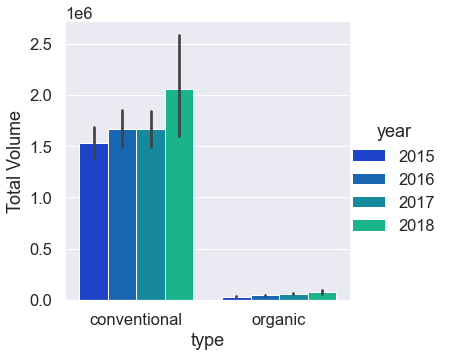

In [139]:
#checking Total volume sold per year w.r.t the type of avocados using barplot
plt.figure(figsize=(16,12))
sns.catplot(x="type", y="Total Volume", hue="year", kind="bar", data=df, palette="winter")
plt.show()

Remarks: In the above bar plot, we see that the Total Volume for conventional type was high in all 4 years as compared to organic type.

<Figure size 1080x720 with 0 Axes>

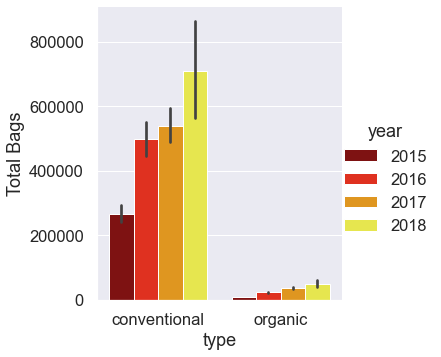

In [141]:
#checking Total Bags used per year w.r.t the type of avocados using barplot
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Bags", hue="year", data=df, kind="bar", palette="hot")
plt.show()

Remarks: In the above bar plot,we see that as the Total Volume sold was always high for conventional types hence, the usage of bags was higher for conventional type over the organic ones.

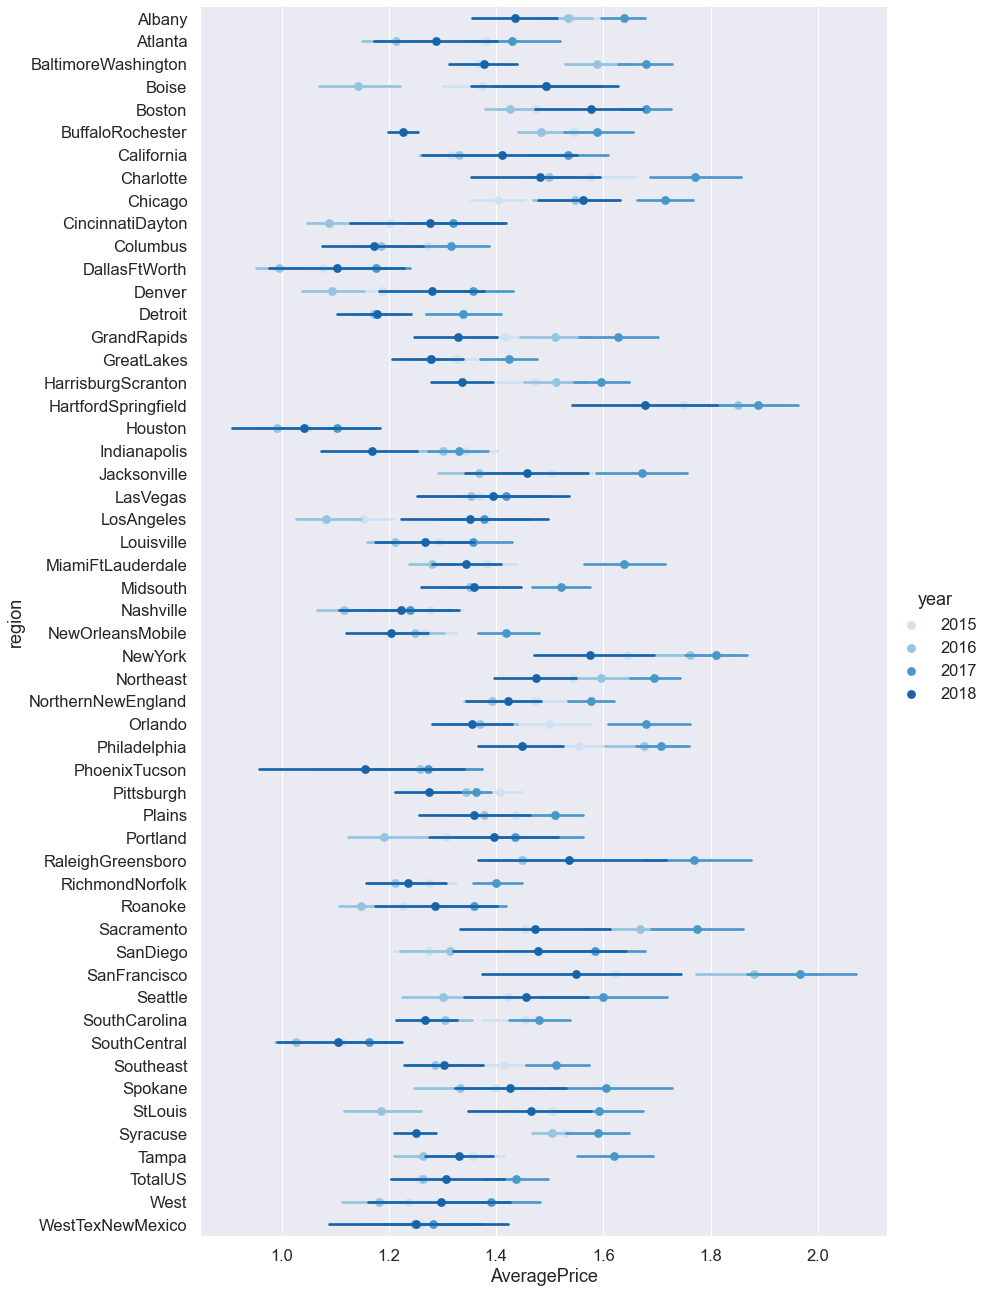

In [142]:
#Checking the average price of avocados per year w.r.t the region using factorplot
sns.factorplot('AveragePrice','region',data=df,
                hue='year',
                size=18,
                aspect=0.7,
                palette='Blues',
                join=False,
            )

Remarks: It shows that there was a huge hike in Avocado prices as the demand was little high in Year 2017 in SanFranciso region.

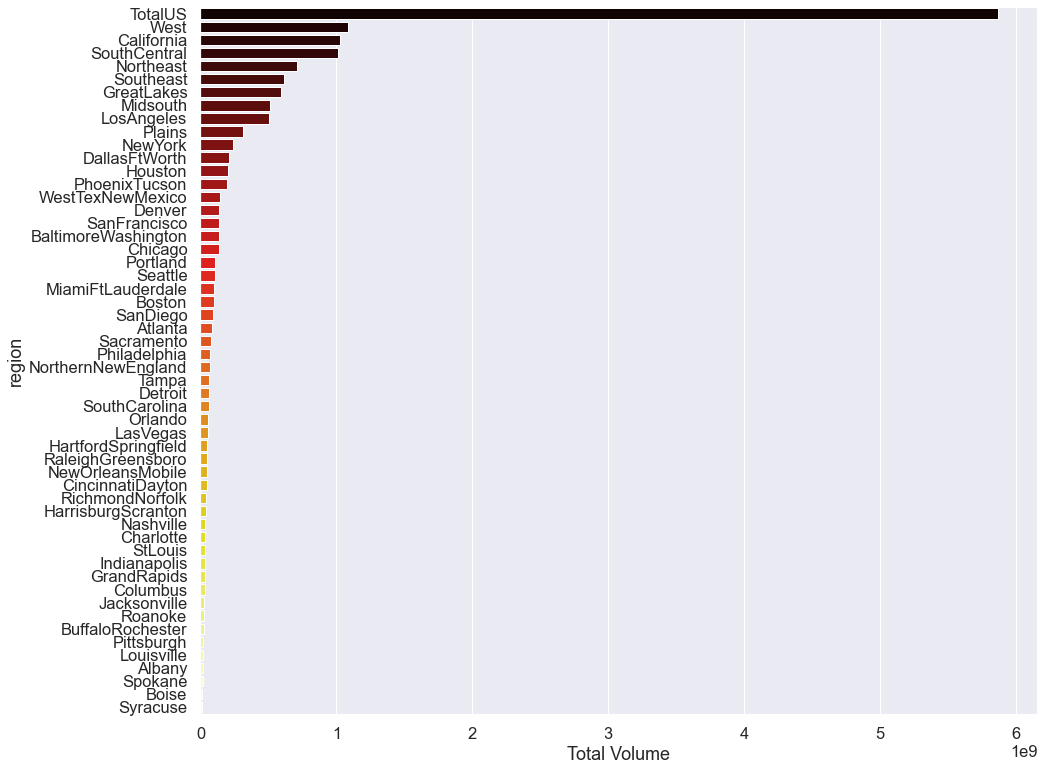

In [144]:
#checking the Total volume of avocados sold w.r.t the region using barplot
Region = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=Region["Total Volume"], y=Region["region"], data=df, palette="hot")
plt.show()

Remarks: In the above bar plot,we can see when compared to the TotalUS area per region values are lesser but still there are other major contributors in region such as West, California, South Central, North East, South East, Great Lakes, Mid South, LosAngeles, Plains, New York and so on.

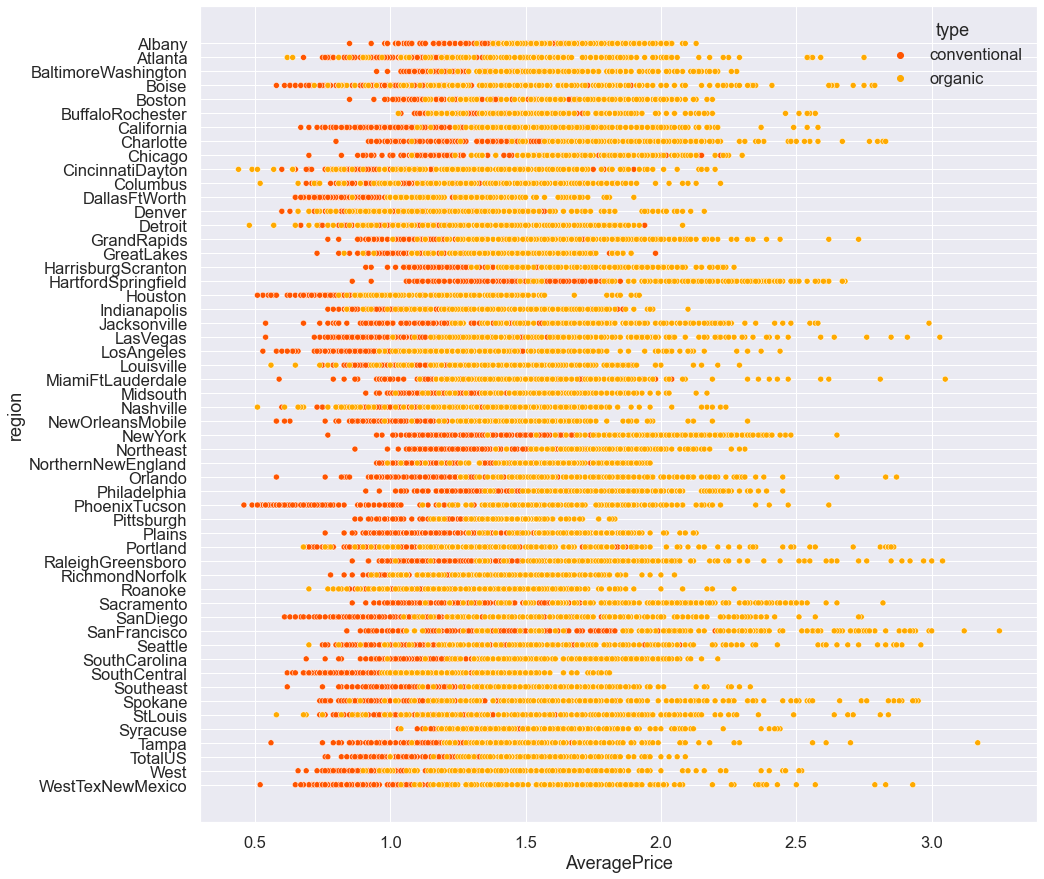

In [145]:
#checking scatter plot for average price per region w.r.t the type of avocados
plt.figure(figsize=(15,15))
sns.scatterplot(x='AveragePrice', y='region', hue='type', data=df, palette="autumn")
plt.show()

Remarks: It shows that the organic type is priced way higher compared to the conventional type of avocados in all the regions.

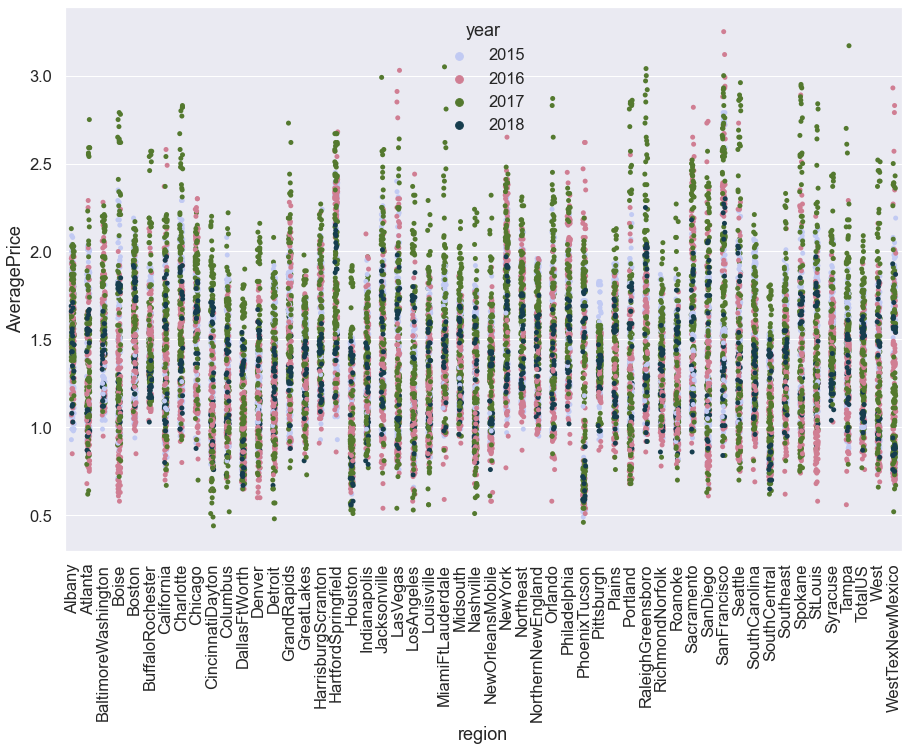

In [149]:
#checking scatterplot for average price per year w.r.t. the regions
plt.figure(figsize=(15,10))
sns.stripplot(x='region', y='AveragePrice', hue="year", data=df, palette="cubehelix_r")
plt.xticks(rotation=90)
plt.show()

Remarks: It shows that in the year 2016 and 2017, the average prices were higher than in the year 2015 and 2018.

# Multivariate Analysis:

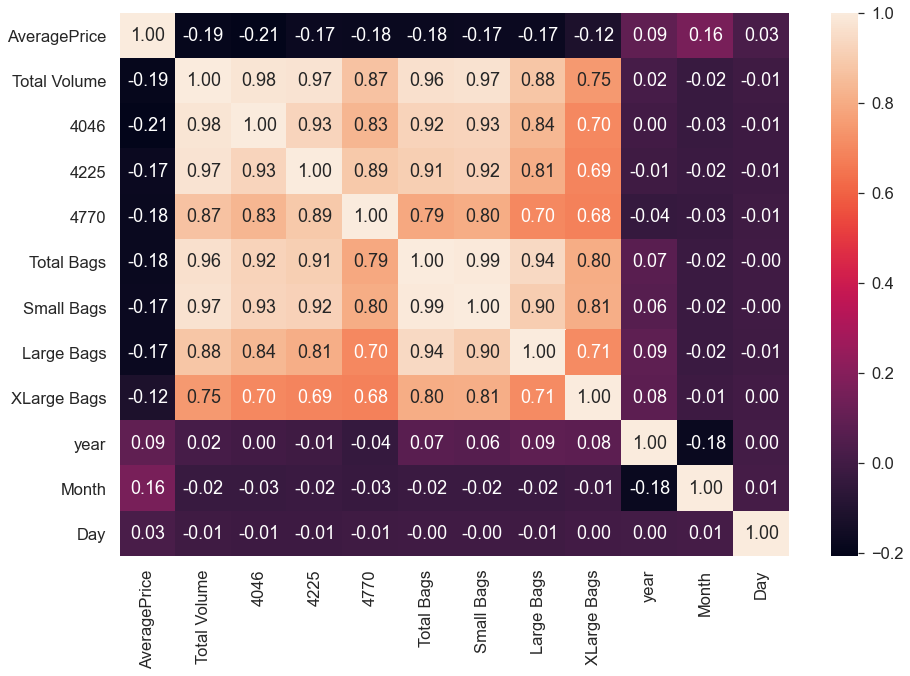

In [159]:
#Checking correlation between features and displaying it using heatmap.
df_corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,annot=True,fmt='.2f')
plt.show()

Remarks: There are 2 types of correlation namely: Positive correlation (+1) meaning that both variables move in the same direction together and Negative correlation (–1) meaning that as one variable goes up, the other goes down.

As seen from the heatmap above, all the Features are not correleted with the AveragePrice column, instead most of them are correlated with each other which will not help us to build a good model.

In [ ]:
# dropping the column "date" as it is useless now
df.drop(columns=['Date'],inplace=True)
df.head()

# Label Encoding:

In [168]:
#Encoding categorical variables.
from sklearn.preprocessing import LabelEncoder
le = {}
encoded_value = {}
for i in df.columns:
    if df[i].dtype == object:
        le[i] = LabelEncoder()
        encoded_value[i] = le[i].fit_transform(df[i])
        print(f"{i} => {le[i].classes_}")

#Replacing encoded values with original values into new dataframe
df_new = df.copy()
for i in le.keys():
    df_new[i] = encoded_value[i]
    
df_new.head() #Printing first 5 rows

type => ['conventional' 'organic']
region => ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  region  Month  Day  
0     8603.62       93.25          0.0     0  2015       0     12   27  
1     9408.07       97.49          0.0     0  2015       0     12   20  
2     8042.21      103.14          0.0     0  2015       0     12   13  
3     5677.40      133.76          0.0     0  2015       0     12    6  
4     5986.26      197.69          0.0     0  2015       0     11   29

In [169]:
df_new.tail() #Printing first 5 rows

AveragePrice  Total Volume     4046     4225    4770  Total Bags  \
18244          1.63      17074.83  2046.96  1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70  3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92  2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63  2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77  2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  year  region  Month  Day  
18244    13066.82      431.85          0.0     1  2018      53      2    4  
18245     8940.04      324.80          0.0     1  2018      53      1   28  
18246     9351.80       42.31          0.0     1  2018      53      1   21  
18247    10919.54       50.00          0.0     1  2018      53      1   14  
18248    11988.14       26.01          0.0     1  2018      53      1    7

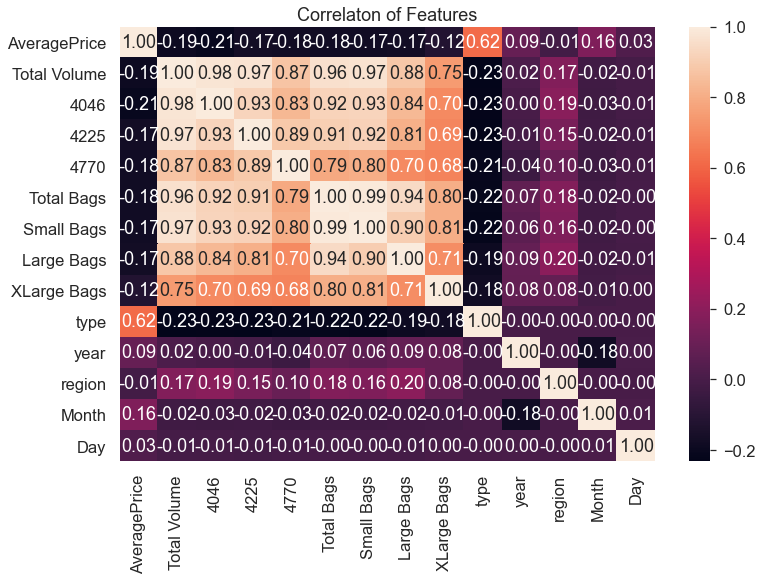

In [170]:
#Checking Correlation of features
df_new_corr = df_new.corr()

#visualizing using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_new_corr,annot=True,fmt='0.2f')
plt.title('Correlaton of Features')
plt.show()

Remarks: Feature Day and Month have very weak correlation with all other features.

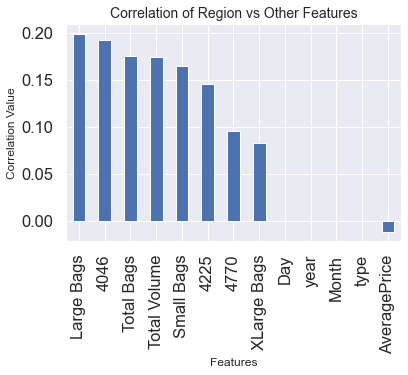

In [171]:
#Checking correlation of feature Region as Target with other features using bar plot
df_new_corr['region'].sort_values(ascending=False).drop('region').plot.bar()
plt.title('Correlation of Region vs Other Features',fontsize=14)
plt.xlabel('Features',fontsize=12)
plt.ylabel('Correlation Value',fontsize=12)
plt.show()

Remarks:
    Negatively correlated features: Average Price.

    Positively correlated features: Large Bags, 4046, Total Volume, 4225, Total Bags, Small Bags, XLarge Bags and 4770.

    Feature Day, Month, year and type shows no correlation with region.
    
    So we can conclude from the above pbservations that Feature Month, Day and type can be dropped from dataset when TARGET variable is region (Classification model)

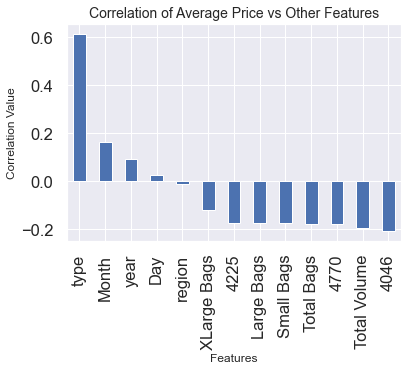

In [172]:
#Checking correlation of feature AveragePrice as Target with other features using bar plot
df_new_corr['AveragePrice'].sort_values(ascending=False).drop('AveragePrice').plot.bar()
plt.title('Correlation of Average Price vs Other Features',fontsize=14)
plt.xlabel('Features',fontsize=12)
plt.ylabel('Correlation Value',fontsize=12)
plt.show()

Remarks:

Negatively correlated features:
    Region, 4046, Large Bags, Total Volume, Total Bags, 4770, Small Bags, 4225 and XLarge Bags.

Positively correlated features:
    Year, Day and Month and type.

Conclusion: When TARGET variable is Average Price, it is Regression problem.

# Checking Skewness:

In [174]:
#Checking skewness of data (optimum value -0.5 to +0.5)
df_new.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
Day              0.014310
dtype: float64

Remarks: Data is heavely skewed in all features except AveragePrice, type, region, Day, Month and it needs to be treated accordingly.

# Checking Outliers:

<AxesSubplot:xlabel='variable', ylabel='value'>

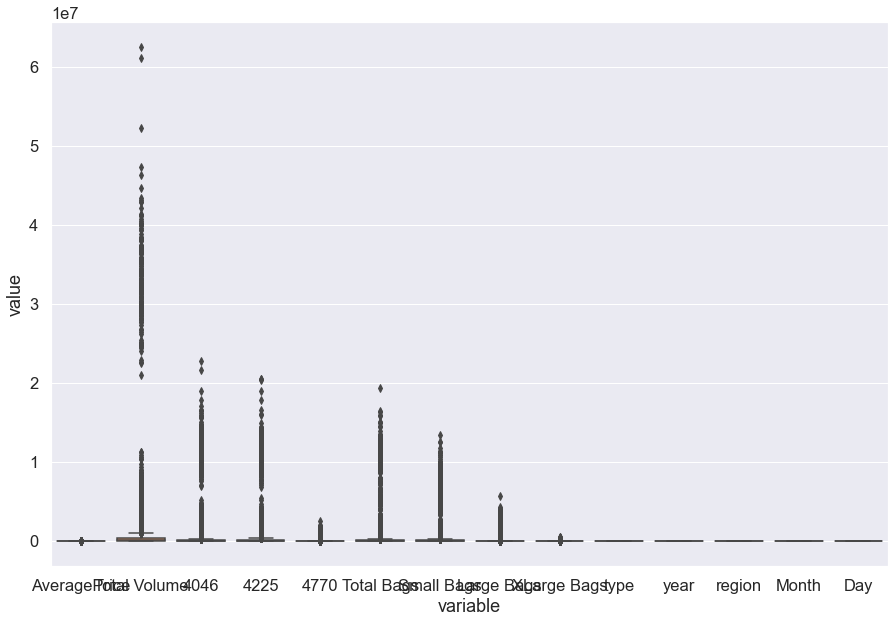

In [175]:
#plotting boxplots to visualize outliers
plt.figure(figsize=(15,10))
sns.boxplot(x='variable',y='value',data=pd.melt(df_new))

Remarks: The above boxplots shows the presence of outliers in the dataset.

# Removing Outliers:

In [176]:
from scipy.stats import zscore

#Checking outliers using zscore with threshold value -3 to +3
z = np.abs(zscore(df_new))
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

In [177]:
#Removing outliers
df_final = df_new[(z<=3).all(axis=1)]

print(f"Original Shape: {df_new.shape}")
print(f"New Shape: {df_final.shape}")
print(f"% Loss: {(len(df_new)-len(df_final))*100/len(df_new)}")

Original Shape: (18249, 14)
New Shape: (17651, 14)
% Loss: 3.276891884486821


Remarks: Since Loss of data is  3.27%, therefore, we will be proceeding with outliers removed data.

# Preparing Data for Model Building:

# 1. Classification Model

In [179]:
#Separating Input and Output/Target Variables
x_class = df_final.drop(columns=['Day','Month','type','year']) #Input variable
y_class = df_final['region'] #Target variable

print(x_class.shape)
print(y_class.shape)

(17651, 10)
(17651,)


In [180]:
#Treating skewness of data
from sklearn.preprocessing import power_transform, StandardScaler
x_class_t = power_transform(x_class,method='yeo-johnson')

In [181]:
#Scaling data for model training using Standard Scaler
sc_class = StandardScaler()
x_class_scaled = sc_class.fit_transform(x_class_t)
x_class_scaled.shape

(17651, 10)

# Finding the best model:

In [183]:
#Defining function for best random state
def get_best_rstate(r,model,m_type,x,y,test_size=0.25):
    best_rState = 0
    best_mScore = 0
    for i in r:
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=i)
        
        model.fit(x_train,y_train)
        predict_y = model.predict(x_test)
        
        if m_type == "R":
            temp_r2Score = r2_score(y_test,predict_y)
            if temp_r2Score>best_mScore:
                best_mScore = temp_r2Score
                best_rState = i
        
        if m_type == "C":
            temp_aScore = accuracy_score(y_test,predict_y)
            if temp_aScore>best_mScore:
                best_mScore = temp_aScore
                best_rState = i
                
    return best_rState,best_mScore


#Defining function for best Cross validation score
def get_best_cv(model,parameters,x_train,y_train,r=range(2,20)):
    best_cv = 0
    best_cvScore = 0
    for i in r:
        gscv = GridSearchCV(model,parameters)
        gscv.fit(x_train,y_train)
        
        temp_cvScore = cross_val_score(gscv.best_estimator_,x_train,y_train,cv=i).mean()
        if temp_cvScore>best_cvScore:
            best_cvScore = temp_cvScore
            best_cv = i
            
    return best_cv,best_cvScore

#Defining function for building models
def build_model(m_type,models,x,y,r_range=range(100),t_size=0.25,cv_range=range(2,20)):
    for i in models:
        print(f"Processing {i}...")
        #Finding the best random_state for train test split
        best_rState, best_mScore = get_best_rstate(r_range,models[i]["name"],m_type,x,y)
        
        #Splitting train test data with best random_state
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=t_size,random_state=best_rState)
        
        #Hypertuning Parameters
        #Finding best CV
        best_cv, best_cvScore = get_best_cv(models[i]["name"],models[i]["parameters"],x_train,y_train,cv_range)
        
        #Building final model with hypertuned parameters
        gscv = GridSearchCV(models[i]["name"],models[i]["parameters"],cv=best_cv)
        gscv.fit(x_train,y_train)
        
        #Checking Final Performance of the model
        predict_y = gscv.best_estimator_.predict(x_test)
        
        if m_type == "R":
            r2Score = r2_score(y_test,predict_y)
            mse = mean_squared_error(y_test,predict_y)
            mae = mean_absolute_error(y_test,predict_y)
            models[i]["initial_r2_score"] = best_mScore
            models[i]["r2_score"] = r2Score
            models[i]["mse"] = mse
            models[i]["rmse"] = np.sqrt(mse)
            models[i]["mae"] = mae
            
        if m_type == "C":
            aScore = accuracy_score(y_test,predict_y)
            cMatrix = confusion_matrix(y_test,predict_y)
            cReport = classification_report(y_test,predict_y)
            models[i]['initial_accuracy_score'] = best_mScore
            models[i]['accuracy_score'] = aScore
            models[i]['confusion_matrix'] = cMatrix
            models[i]['classification_report'] = cReport
        
        #Storing model specifications
        models[i]["random_state"] = best_rState
        models[i]["x_train"] = x_train
        models[i]["x_test"] = x_test
        models[i]["y_train"] = y_train
        models[i]["y_test"] = y_test
        models[i]["cv"] = best_cv
        models[i]["cross_val_score"] = best_cvScore
        models[i]["gscv"] = gscv
        models[i]["predict_y"] = predict_y
        
        print(f"\tCompleted...\n")
    return models;

In [184]:
#List of models with parameters
models = {
    "GaussianNB":{
        "name": GaussianNB(),
        "parameters": {
            "var_smoothing": [1e-9,1e-8]
        }
    },
    "SVC":{
        "name": SVC(),
        "parameters": {
            "kernel": ['linear','poly','rbf','sigmoid'],
            "gamma": ['scale','auto'],
            "shrinking": [True,False]
        }
    },
    "DecisionTreeClassifier":{
        "name": DecisionTreeClassifier(),
        "parameters":{
            "criterion": ['gini','entropy'],
            "splitter": ['best','random']            
        }
    },
    "AdaBoostClassifier":{
        "name": AdaBoostClassifier(),
        "parameters":{
            "n_estimators": [50,100],
            "algorithm": ['SAMME','SAMME.R']
        }
    }
}

#Testing models and storing results
build_models = build_model("C",models,x_class_scaled,y_class)

Processing GaussianNB...
	Completed...

Processing SVC...
	Completed...

Processing DecisionTreeClassifier...
	Completed...

Processing AdaBoostClassifier...
	Completed...



In [185]:
#Displaying model performance and comparing it to select best model.
for i in build_models:
    model = build_models[i]
    print(f"START: {i}\n")
    print(f"\tBest random_state: {model['random_state']} with best accuracy_score: {model['initial_accuracy_score']}\n")
    print(f"\tBest CV: {model['cv']} with best cross_val_score: {model['cross_val_score']}\n")
    print(f"\tBest Parameters: {model['gscv'].best_params_}\n\n")
    print(f"----Final Performance----")
    print(f"Accuracy Score: {round(model['accuracy_score']*100,2)}%\n")
    print(f"Confusion Matix:\n{model['confusion_matrix']}\n")
    print(f"Classification Report:\n{model['classification_report']}\n")
    print(f"END: {i}\n\n\n")

START: GaussianNB

	Best random_state: 0 with best accuracy_score: 1.0

	Best CV: 2 with best cross_val_score: 1.0

	Best Parameters: {'var_smoothing': 1e-09}


----Final Performance----
Accuracy Score: 100.0%

Confusion Matix:
[[74  0  0 ...  0  0  0]
 [ 0 82  0 ...  0  0  0]
 [ 0  0 78 ...  0  0  0]
 ...
 [ 0  0  0 ... 43  0  0]
 [ 0  0  0 ...  0 59  0]
 [ 0  0  0 ...  0  0 72]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        82
           2       1.00      1.00      1.00        78
           3       1.00      1.00      1.00        87
           4       1.00      1.00      1.00        84
           5       1.00      1.00      1.00        75
           6       1.00      1.00      1.00        72
           7       1.00      1.00      1.00        85
           8       1.00      1.00      1.00        98
           9       1.00      1.00      1.00        

Remarks:
    
    From above models, both GuassianNB and DecisionTreeClassifier performs best with accuracy score of 100%. But we are proceeding with GaussianNB.

# Saving the best ML Model:

In [187]:
#Selecting final model
final_class_model = build_models["GaussianNB"]

#Storing model into file
filename = "Avacado_Classification_Model.pkl"
joblib.dump(final_class_model["gscv"].best_estimator_,open(filename,"wb"))

# Conclusion:

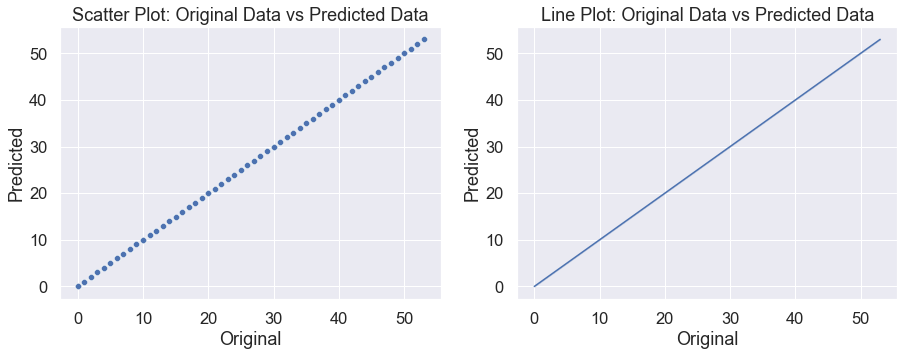

In [188]:
#Visualizing original and predicted value with the help of scatterplot
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

sns.scatterplot(final_class_model['y_test'],final_class_model['predict_y'],ax=ax1)
ax1.set_title("Scatter Plot: Original Data vs Predicted Data")
ax1.set_xlabel("Original")
ax1.set_ylabel("Predicted")

sns.lineplot(final_class_model['y_test'],final_class_model['predict_y'],ax=ax2)
ax2.set_title("Line Plot: Original Data vs Predicted Data")
ax2.set_xlabel("Original")
ax2.set_ylabel("Predicted")

plt.show()

# Final conclusion:
Final model GuassianNB performs well with an accuracy score of 100%.

# 2. Regression Model

In [195]:
#Seperating Input and Output/Target Variables
x_reg = df_final.drop(columns=['type']) #Input variable
y_reg = df_final['AveragePrice'] #Target variable

print(x_reg.shape)
print(y_reg.shape)

(17651, 13)
(17651,)


In [196]:
#Treating skewness of data
x_reg_t = power_transform(x_reg,method='yeo-johnson')

In [197]:
#Scaling data for model training
sc_reg = StandardScaler()
x_reg_scaled = sc_reg.fit_transform(x_reg_t)

# Finding the best model:

In [198]:
#list of models
models = {
    "LinearRegression":{
        "name": LinearRegression(),
        "parameters":{
            "fit_intercept": [True,False],
            "normalize": [True,False]
        }
    },
    "SGDRegressor":{
        "name": SGDRegressor(),
        "parameters":{
            "loss": ['squared_loss','huber','epsilon_insensitive'],
            "penalty": ['l2','l1','elasticnet'],
        }
    },
    "Ridge":{
        "name": Ridge(),
        "parameters":{
            "max_iter": [1000,1500,2000,2500],
            "solver": ['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']
        }
    },
    "AdaBoostRegressor":{
        "name": AdaBoostRegressor(),
        "parameters":{
            "loss": ['linear','square','exponential']
        }
    },
}

#Testing models and storing results
build_reg_models = build_model("R",models,x_reg_scaled,y_reg)

Processing LinearRegression...
	Completed...

Processing SGDRegressor...
	Completed...

Processing Ridge...
	Completed...

Processing AdaBoostRegressor...
	Completed...



In [200]:
#visualizing model performance and comparing it to select best model.
for i in build_reg_models:
    model = build_reg_models[i]
    print(f"START: {i}\n")
    print(f"\tBest random_state: {model['random_state']} with best r2_score: {model['initial_r2_score']}\n")
    print(f"\tBest CV: {model['cv']} with best cross_val_score: {model['cross_val_score']}\n")
    print(f"\tBest Parameters: {model['gscv'].best_params_}\n\n")
    print(f"----Final Performance----")
    print(f"R2 Score: {round(model['r2_score']*100,2)}%\n")
    print(f"Mean Squared Error (MSE): {model['mse']}\n")
    print(f"Root Mean Squared Error (RMSE): {model['rmse']}\n")
    print(f"Mean Absolute Error (MAE): {model['mae']}\n")
    print(f"END: {i}\n\n\n")

START: LinearRegression

	Best random_state: 4 with best r2_score: 0.9907620410009753

	Best CV: 18 with best cross_val_score: 0.9899937871173835

	Best Parameters: {'fit_intercept': True, 'normalize': True}


----Final Performance----
R2 Score: 99.08%

Mean Squared Error (MSE): 0.0013366410391403105

Root Mean Squared Error (RMSE): 0.036560101738648244

Mean Absolute Error (MAE): 0.026911459927649192

END: LinearRegression



START: SGDRegressor

	Best random_state: 4 with best r2_score: 0.9907639218709933

	Best CV: 4 with best cross_val_score: 0.9899751844106682

	Best Parameters: {'loss': 'squared_loss', 'penalty': 'l1'}


----Final Performance----
R2 Score: 99.07%

Mean Squared Error (MSE): 0.0013391531225549805

Root Mean Squared Error (RMSE): 0.036594441142815404

Mean Absolute Error (MAE): 0.02705553271646415

END: SGDRegressor



START: Ridge

	Best random_state: 4 with best r2_score: 0.9907629298304637

	Best CV: 6 with best cross_val_score: 0.9899922681099323

	Best Paramete

Remarks: From above models, AdaBoostRegressor performs best with R2 Score of 99.72% hence,proceeding with this as our final model.

# Saving the best ML model:

In [202]:
#Selecting final model
final_reg_model = build_reg_models["AdaBoostRegressor"]

#Storing model into file
filename = "Avacado_Regression_Model.pkl"
joblib.dump(final_reg_model["gscv"].best_estimator_,open(filename,"wb"))

# Conclusion:

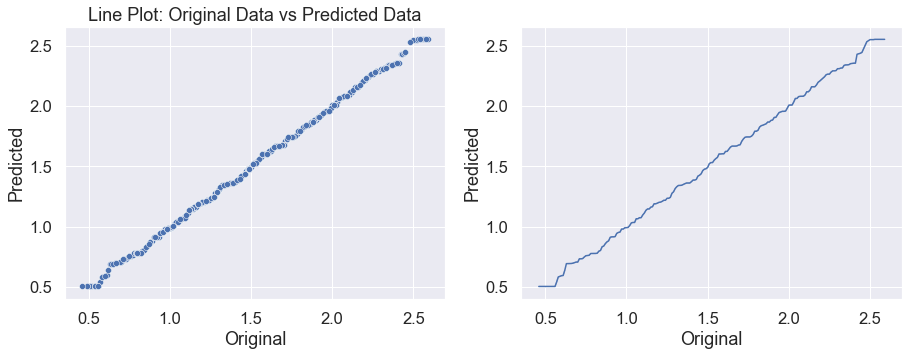

In [203]:
#visualizing original and predicted value with the help of scatterplot and lineplot
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

sns.scatterplot(final_reg_model['y_test'],final_reg_model['predict_y'],ax=ax1)
ax1.set_title("Scatter Plot: Original Data vs Predicted Data")
ax1.set_xlabel("Original")
ax1.set_ylabel("Predicted")

sns.lineplot(final_reg_model['y_test'],final_reg_model['predict_y'],ax=ax2)
ax1.set_title("Line Plot: Original Data vs Predicted Data")
ax2.set_xlabel("Original")
ax2.set_ylabel("Predicted")

plt.show()

# Final Remarks:
The Final Regression Model AdaBoostRegressor performs well with R2 Score of 99.84%.

# CONCLUSION:
    
    1. We built two model from the avocado dataset. One is Classification model and the other one is Regression model.
    2. We did EDA to have a better understanding of the data and how we could process it to build our models.
    3. For the classification model, we found that Gaussian performs well with accuracy of 100%.
    4. For the Regression model, we found that AdaBoostRegressor performs well with R2 Score of 99.72%.